In [1]:
import xarray as xr
import src.Teleconnection.tools as tools
import src.composite.field_composite as composite

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import proplot as pplt
import cartopy.crs as ccrs

In [15]:
import src.plots.utils as utils
import matplotlib as mpl
import src.plots.composite_spatial_pattern as composite_plots

# Read Data

The data to be averaged

In [4]:
# %%
print("reading data...")
# data
allens = xr.open_dataset(
    "/work/mh0033/m300883/transition/gr19/gphSeason/allens_season_time.nc"
)
# split ens
splitens = tools.split_ens(allens)

# demean ens-mean
demean = splitens - splitens.mean(dim="ens")

# select traposphere
trop = demean.sel(hlayers=slice(20000, 100000))

trop = trop.var156


reading data...


## Pre-process the field data

standardize

In [5]:
trop = tools.standardize(trop)

## The index as the conditions

In [6]:
first_index = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/first10_all_whole.nc").pc

In [7]:
last_index = xr.open_dataset("/work/mh0033/m300883/3rdPanel/data/allPattern/dep/all_pattern/last10_all_whole.nc").pc

## Composite 

In [8]:
first_sptial_pattern = composite.Tel_field_composite(first_index,trop)

In [9]:
last_sptial_pattern = composite.Tel_field_composite(last_index,trop)

## show spatial maps

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


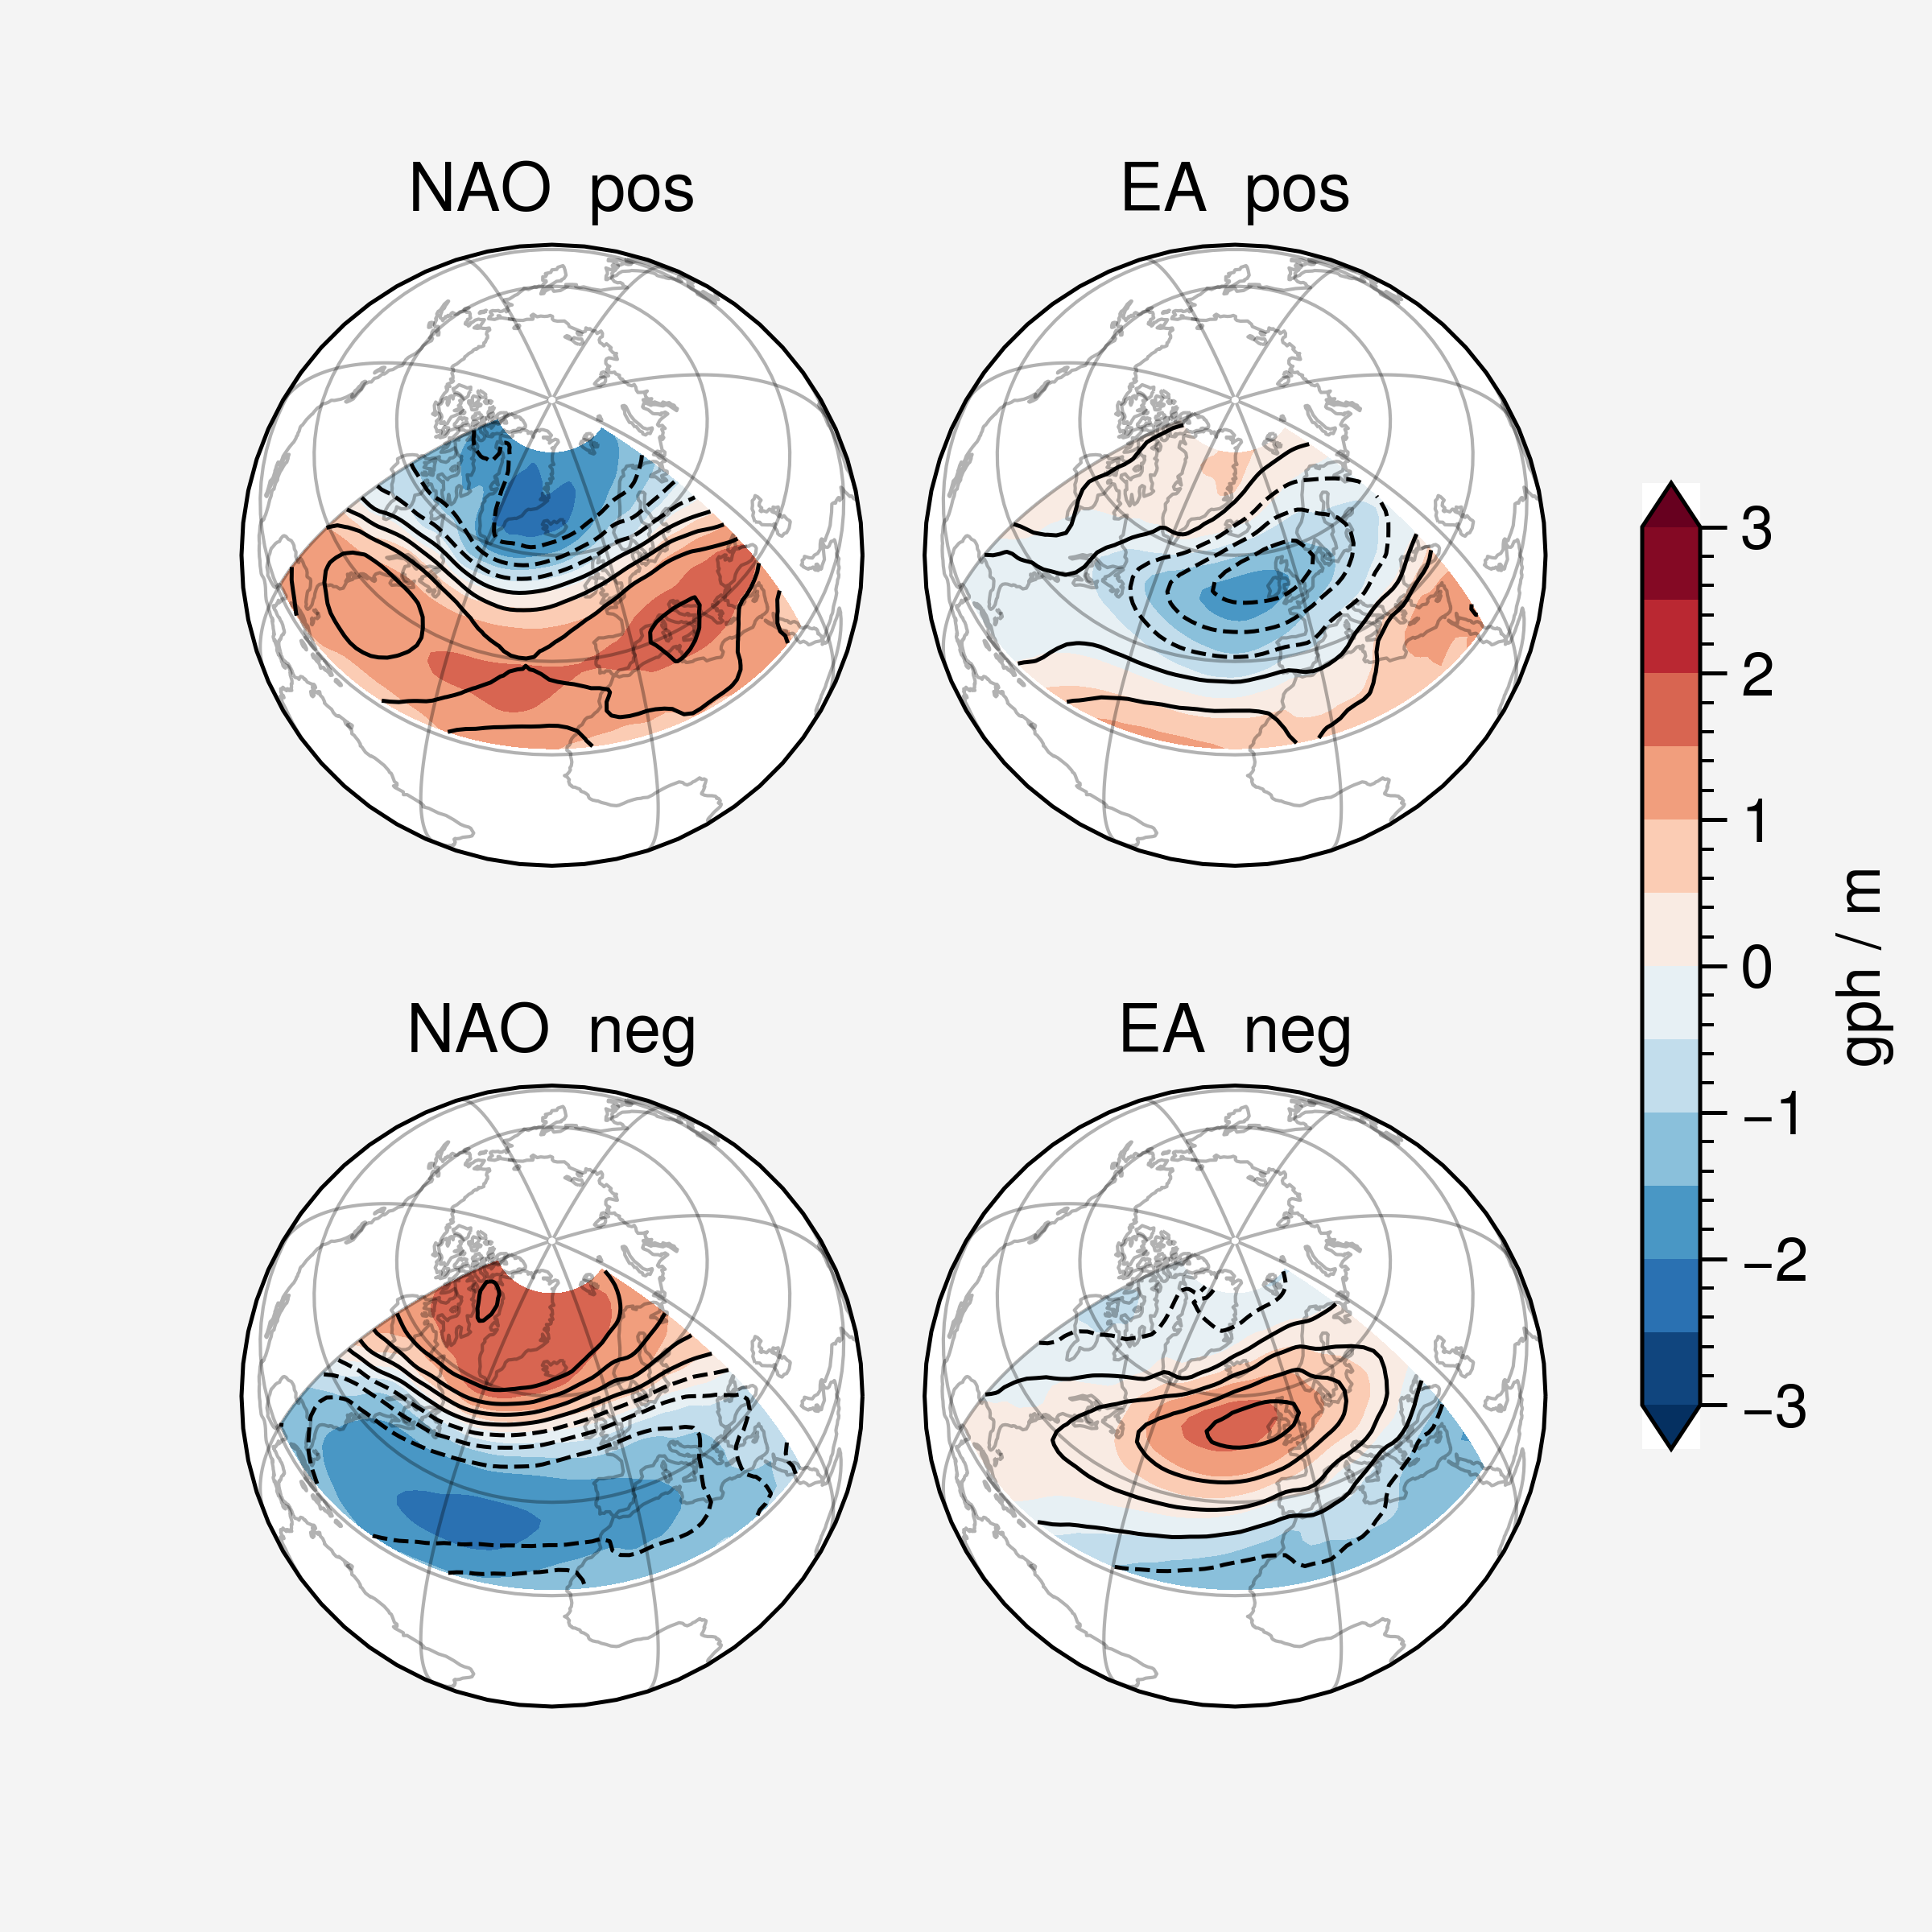

In [16]:
composite_plots.composite_gph(first_sptial_pattern, last_sptial_pattern, levels = np.arange(-3,3.1,0.5), hlayers=100000)

/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)
/home/m/m300883/miniconda3/envs/thirdPanel/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


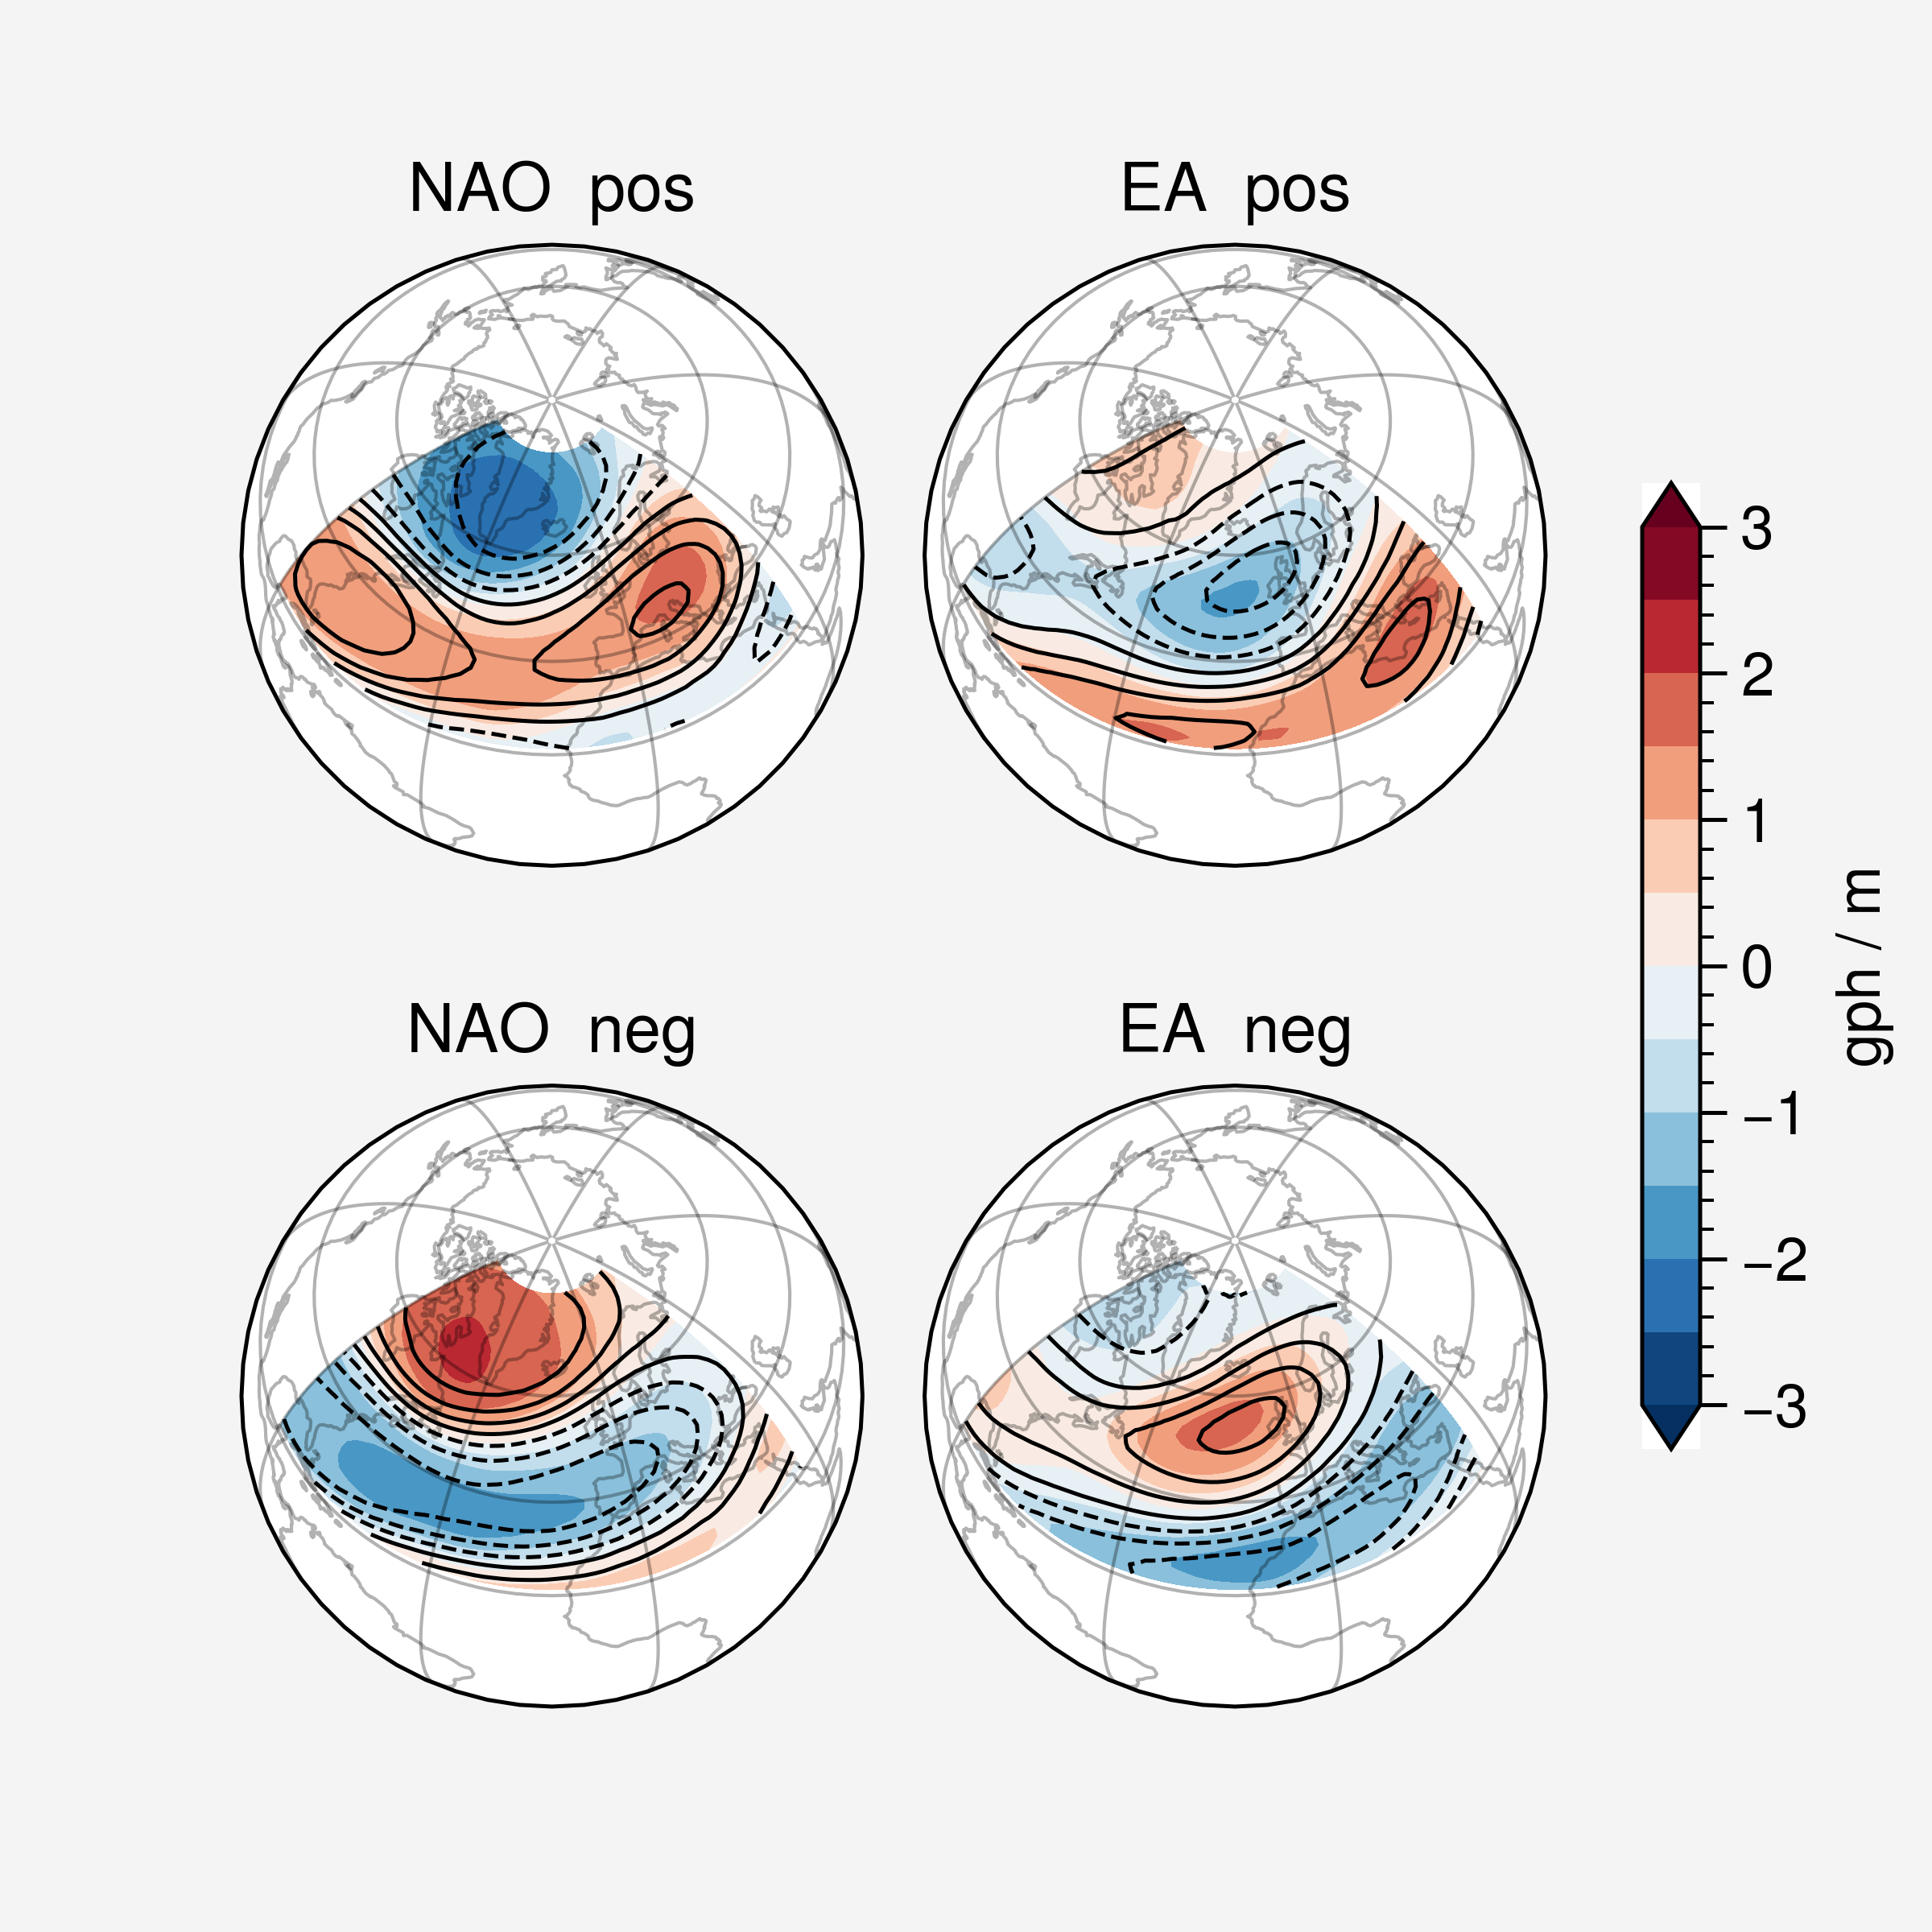

In [17]:
composite_plots.composite_gph(first_sptial_pattern, last_sptial_pattern, levels = np.arange(-3,3.1,0.5), hlayers=50000)

# Vertical section

In [18]:
import src.Teleconnection.pattern_statistic as pattern_stat

In [19]:
first_sptial_pattern

<xarray.DataArray 'var156' (hlayers: 11, mode: 2, extr_type: 2, lat: 32, lon: 70)>
array([[[[[-1.61774313e+00, -1.64082468e+00, -1.66332245e+00, ...,
           -7.86043406e-01, -7.70119786e-01, -7.56163895e-01],
          [-1.65660572e+00, -1.68566597e+00, -1.71412110e+00, ...,
           -6.21412456e-01, -6.03572369e-01, -5.88465154e-01],
          [-1.67460644e+00, -1.70999229e+00, -1.74451613e+00, ...,
           -4.39950973e-01, -4.21431839e-01, -4.06363308e-01],
          ...,
          [ 9.52233493e-01,  9.19618428e-01,  8.84475350e-01, ...,
            1.32896960e-01,  1.45403877e-01,  1.60192400e-01],
          [ 7.87879586e-01,  7.47246385e-01,  7.05747247e-01, ...,
            2.39816815e-01,  2.57186025e-01,  2.75740534e-01],
          [ 5.81114590e-01,  5.37780166e-01,  4.93838072e-01, ...,
            3.19784969e-01,  3.40698332e-01,  3.61219585e-01]],

         [[ 1.20032883e+00,  1.21912956e+00,  1.23710644e+00, ...,
            5.79018056e-01,  5.73377371e-01,  5.69137514e-01],
          [ 1.26853764e+00,  1.29146373e+00,  1.31326842e+00, ...,
            4.75060672e-01,  4.68056381e-01,  4.62988734e-01],
          [ 1.32921219e+00,  1.35605216e+00,  1.38150954e+00, ...,
            3.68487388e-01,  3.60516429e-01,  3.54887992e-01],
...
            1.07952237e+00,  1.17410612e+00,  1.25926268e+00],
          [-3.46908212e-01, -3.75207990e-01, -4.06668335e-01, ...,
            1.03228068e+00,  1.10212469e+00,  1.19505131e+00],
          [-3.56499583e-01, -3.77248347e-01, -3.97009790e-01, ...,
            1.11776519e+00,  1.16728020e+00,  1.22391868e+00]],

         [[-4.34387475e-01, -4.31704193e-01, -4.28443342e-01, ...,
           -5.36218226e-01, -5.37170410e-01, -5.38353622e-01],
          [-4.45340186e-01, -4.41354096e-01, -4.35427189e-01, ...,
           -4.60286766e-01, -4.63524073e-01, -4.66547400e-01],
          [-4.64249313e-01, -4.61413532e-01, -4.55172956e-01, ...,
           -3.59570563e-01, -3.65752697e-01, -3.71322781e-01],
          ...,
          [ 1.23188093e-01,  2.14506209e-01,  2.87555844e-01, ...,
           -1.23306084e+00, -1.33164597e+00, -1.43675339e+00],
          [ 1.22795835e-01,  2.01638177e-01,  2.74281800e-01, ...,
           -1.14328146e+00, -1.21512365e+00, -1.29123664e+00],
          [ 1.10892773e-01,  1.80919901e-01,  2.39621565e-01, ...,
           -1.15436769e+00, -1.20644784e+00, -1.25166500e+00]]]]],
      dtype=float32)
Coordinates:
  * lon        (lon) float64 -90.0 -88.12 -86.25 -84.38 ... 35.62 37.5 39.38
  * lat        (lat) float64 79.27 77.41 75.54 73.68 ... 27.05 25.18 23.32 21.45
  * hlayers    (hlayers) float64 2e+04 2.5e+04 3e+04 ... 8.5e+04 9.25e+04 1e+05
  * mode       (mode) object 'NAO' 'EA'
  * extr_type  (extr_type) <U3 'pos' 'neg'

In [24]:
first_NAO_lat_height = pattern_stat.lat_height(first_sptial_pattern,mode = 'NAO')
last_NAO_lat_height = pattern_stat.lat_height(last_sptial_pattern,mode = 'NAO')

In [54]:
first_EA_lon_height = pattern_stat.lon_height(first_sptial_pattern,mode = 'EA')
last_EA_lon_height = pattern_stat.lon_height(last_sptial_pattern,mode = 'EA')

/tmp/ipykernel_413395/2615481552.py:14: ProplotWarning: Got conflicting or duplicate keyword args: {'x_positional': <xarray.DataArray 'var156' (hlayers: 11, lat: 32)>
array([[-1.5275282 , -1.5531045 , -1.560409  , -1.5465964 , -1.5085455 ,
        -1.4450177 , -1.3548781 , -1.2380632 , -1.0964793 , -0.9306829 ,
        -0.7414651 , -0.5321634 , -0.30507547, -0.06180647,  0.19526546,
         0.45902726,  0.70985025,  0.918969  ,  1.0654666 ,  1.1446387 ,
         1.1640108 ,  1.1343347 ,  1.0644054 ,  0.9594525 ,  0.82293284,
         0.6597792 ,  0.478536  ,  0.29369843,  0.12161673, -0.02302729,
        -0.1309828 , -0.19805153],
       [-1.4251105 , -1.4775695 , -1.5117074 , -1.5222493 , -1.5058736 ,
        -1.4607536 , -1.3858489 , -1.2850174 , -1.1565901 , -1.0016546 ,
        -0.82058483, -0.6169679 , -0.39392957, -0.15332815,  0.10336123,
         0.37012422,  0.6275515 ,  0.84577036,  1.0015756 ,  1.0876479 ,
         1.1106169 ,  1.0835422 ,  1.0173707 ,  0.91687816,  0.78893

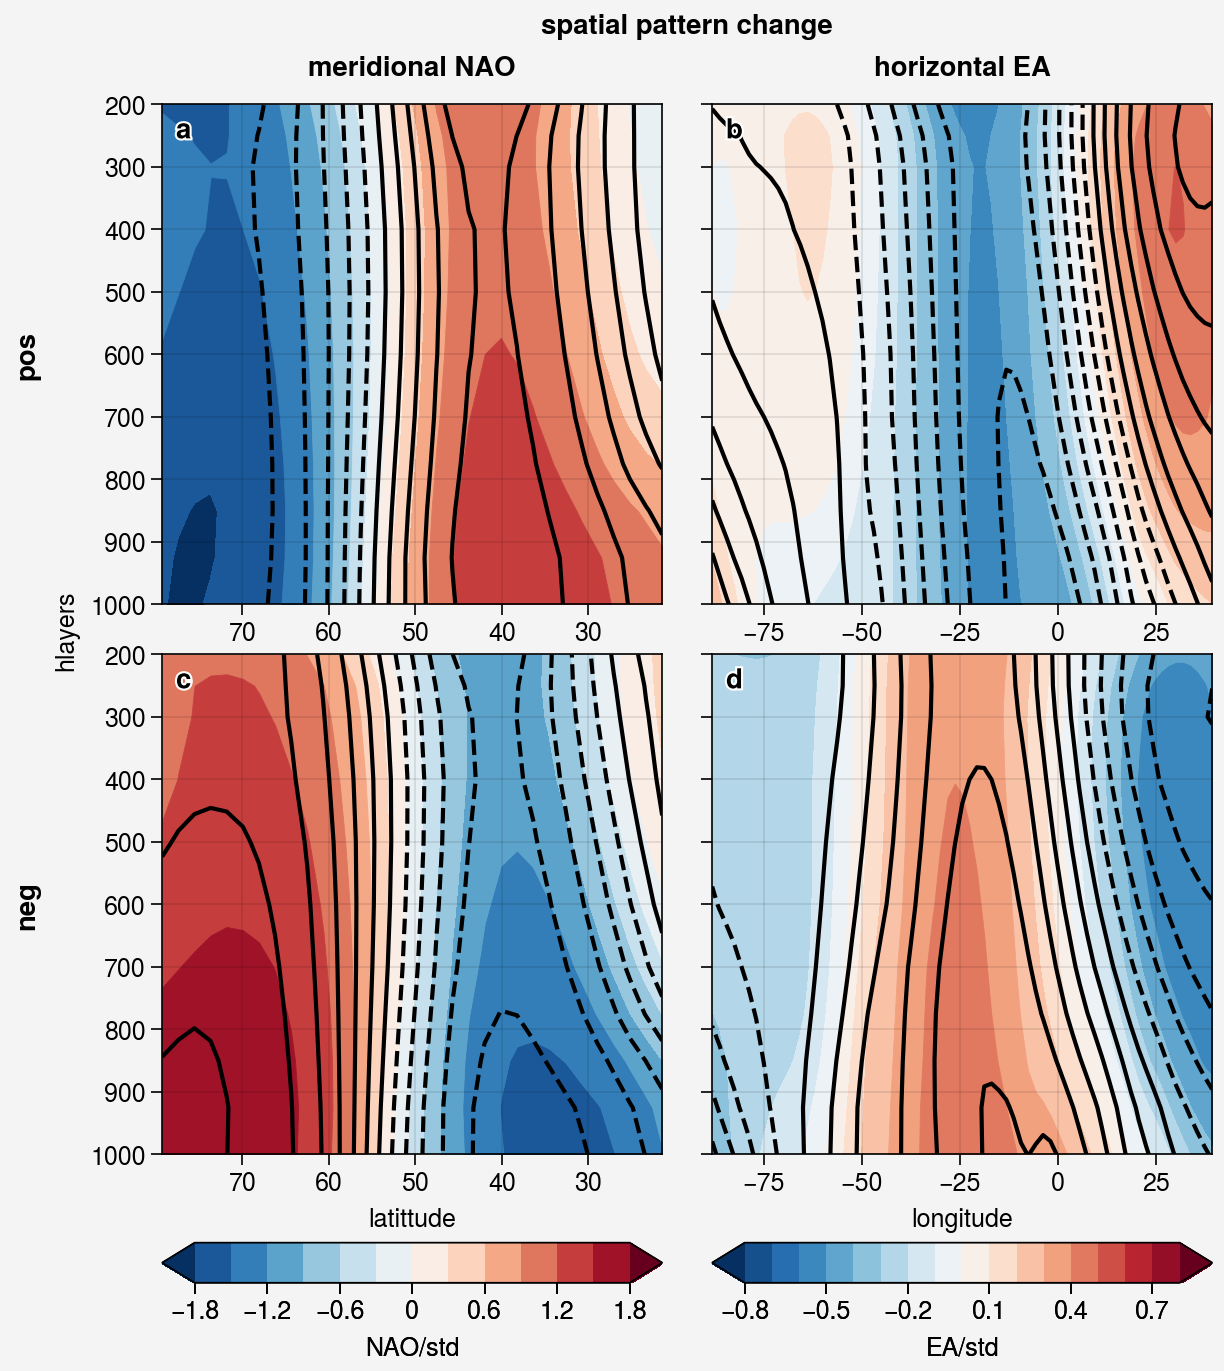

In [97]:
fig, axes = pplt.subplots(nrows = 2,ncols = 2,wspace = 2, hspace = 2,sharex = False)
axes.format(
    abc = 'a',
    abcloc = 'ul',
    xminorlocator = 'null',
    yminorlocator = 'null',
    suptitle = f"spatial pattern change",
    yreverse = True,
    xreverse = False,
    toplabels = ("meridional NAO","horizontal EA"),
    leftlabels = ("pos","neg"),
)

axes[0,0].contourf(first_NAO_lat_height.sel(extr_type = 'pos'),x = 'lat',y = 'hlayers', levels = np.arange(-1.8,1.9,0.3),extend = 'both', )
NAO_map = axes[1,0].contourf(first_NAO_lat_height.sel(extr_type = 'neg'),x = 'lat',y = 'hlayers', levels = np.arange(-1.8,1.9,0.3),extend = 'both', )

axes[0,0].contour(last_NAO_lat_height.sel(extr_type = 'pos'), x = 'lat',y = 'hlayers', levels = np.arange(-1.8,1.9,0.3),extend = 'both', colors = 'k')
axes[1,0].contour(last_NAO_lat_height.sel(extr_type = 'neg'), x = 'lat',y = 'hlayers', levels = np.arange(-1.8,1.9,0.3),extend = 'both', colors = 'k')

axes[0,1].contourf(first_EA_lon_height.sel(extr_type = 'pos'),x = 'lat',y = 'hlayers', levels = np.arange(-0.8,0.9,0.1),extend = 'both', )
EA_map = axes[1,1].contourf(first_EA_lon_height.sel(extr_type = 'neg'),x = 'lat',y = 'hlayers', levels = np.arange(-0.8,0.9,0.1),extend = 'both', )

axes[0,1].contour(last_EA_lon_height.sel(extr_type = 'pos'), x = 'lat',y = 'hlayers', levels = np.arange(-0.8,0.9,0.1),extend = 'both', colors = 'k')
axes[1,1].contour(last_EA_lon_height.sel(extr_type = 'neg'), x = 'lat',y = 'hlayers', levels = np.arange(-0.8,0.9,0.1),extend = 'both', colors = 'k')

axes[1,0].format(xlabel = "latittude")
axes[1,1].format(xlabel = "longitude")

axes[1,0].colorbar(NAO_map,loc = 'b',label = 'NAO/std')
axes[1,1].colorbar(EA_map, loc = 'b',label = 'EA/std')
